In [167]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import scipy.stats as stats

from pandas.api.types import CategoricalDtype

from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [168]:
house_data = pd.read_csv('data/kc_house_data.csv')
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [169]:
test_data = house_data[['id', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
                        'condition','grade', 'yr_built', 'zipcode', 'price'
                       ]].copy()

# Drop id nulls and duplicates 
test_data.drop_duplicates(subset= 'id', keep='first', inplace=True, ignore_index = True)

# bedrooms drop all greater than 6
test_data.drop(test_data.index[test_data['bedrooms'] >= 7], inplace = True)

#bathrooms remove all bathroom values less than 1 , greater than 4 
test_data = test_data[test_data.bathrooms >= 1.0]
test_data = test_data[test_data.bathrooms <= 4.0]
test_data['bathrooms'] = test_data['bathrooms'].dropna()

# sqft_living drop above 5000
test_data = test_data[test_data.sqft_living < 5000]
# test_data['sqft_living'] = test_data['sqft_living'].map(lambda x: np.log(x))   

# May potentially reduce range of year built -- cutoff around 1920

# Price drop outliers 
test_data = test_data[test_data.price < 2000000]
test_data['price'] = test_data['price'].map(lambda x: np.log(x))   


# Waterfront drop nulls 
house_data = house_data[house_data['waterfront'].notna()]
# **************************************************************************************
# ABOVE IS GOOD 







# test_data[nom_features].shape

In [170]:
# house_data = house_data[house_data['waterfront'].notna()]
# len(house_data.waterfront.isna() == True)
house_data.waterfront

1        NO
2        NO
3        NO
4        NO
5        NO
         ..
21591    NO
21592    NO
21593    NO
21594    NO
21596    NO
Name: waterfront, Length: 19221, dtype: object

In [171]:
ord_cat_selector = ['condition', 'grade']
cat_subset = test_data[ord_cat_selector]
cat_subset

ordered_condition = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
ordered_grade = ['4 Low', '5 Fair', '6 Low Average', '7 Average','8 Good',
                 '9 Better', '10 Very Good', '11 Excellent','12 Luxury', 
                 '13 Mansion']

o_enc = OrdinalEncoder(categories = [ordered_condition, ordered_grade])
o_enc.fit(cat_subset)

X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)
X_subset.shape

(20831, 2)

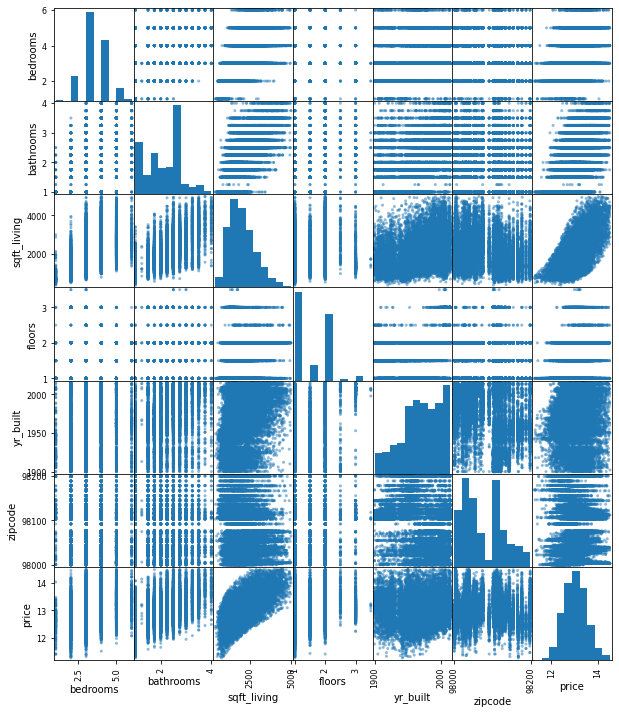

In [183]:
pd.plotting.scatter_matrix(test_data[['bedrooms', 'bathrooms', 'sqft_living', 'floors',
                        'condition','grade', 'yr_built', 'zipcode', 'price']], figsize=(10,12));

In [173]:
# test_data.waterfront

In [174]:
house_data.view

1        NONE
2        NONE
3        NONE
4        NONE
5        NONE
         ... 
21591    NONE
21592    NONE
21593    NONE
21594    NONE
21596    NONE
Name: view, Length: 19221, dtype: object

In [175]:
lr = LinearRegression()
lr

LinearRegression()

In [184]:

# nom_features = ['bathrooms', 'sqft_living', 'floors', 'zipcode', 'price'] #test



nom_features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'yr_built', 'zipcode', 'price'] #original
ord_features = X_subset
dum_waterfront = pd.get_dummies(house_data['waterfront'], prefix = 'wtr', drop_first = True)
X_ = pd.concat([test_data[nom_features], X_subset, dum_waterfront],join = 'inner', axis = 1)
# X_ = test_data[nom_features].join(X_subset, how = 'inner') - #works without waterfront
X = X_.drop(columns = 'price')
y = X_['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [185]:
# dum_waterfront # 19221
# X_ # 21310
# test_data[nom_features] #18557
# ord_features# 18557

In [186]:
lr.fit(X_train, y_train)

LinearRegression()

In [187]:
lr.coef_

array([-0.07356814,  0.13570899,  0.00039944,  0.12532004, -0.00503093,
        0.00034416, -0.00442753,  0.00403854,  0.00440291])

In [188]:
lr.score(X_train, y_train)

0.499601267673083

In [181]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'yr_built', 'zipcode',
       'condition', 'grade', 'wtr_YES'],
      dtype='object')

In [182]:
# This gets the predictions of model on test set.
y_pred = lr.predict(X_test)
#get first ten elements of prediction.
y_pred[0:10]

array([12.5598456 , 12.79040466, 12.78572475, 12.66110237, 12.98794259,
       12.65588311, 13.05755126, 12.56972687, 12.65962595, 12.80011619])

In [73]:
MAE = mean_absolute_error(y_pred, y_test)
MAE

0.2794684327647811

In [74]:
RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
RMSE

0.3474782055020422

In [265]:
# lr.summary()

In [ ]:
"""
sqft, zipcode, grade -- median price 


"""